##MIE1624 - FINAL EXAM PROJECT

Name: Harshitha Janakiraman

Student Number: 1007397158

Colab Link: https://colab.research.google.com/drive/1G8XiaSxG9is1T_ddYmTDRBs77z0wK9ak?usp=sharing

Installing the libraries

In [ ]:
pip install tweet-preprocessor

Python interpreter will be restarted.
Collecting tweet-preprocessor
 Downloading tweet_preprocessor-0.6.0-py3-none-any.whl (27 kB)
Installing collected packages: tweet-preprocessor
Successfully installed tweet-preprocessor-0.6.0
WARNING: You are using pip version 21.0.1; however, version 22.0.4 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-91be9f8d-4d12-498b-a6b3-54c0af9f65b7/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [ ]:
pip install nltk

Python interpreter will be restarted.
Collecting nltk
 Downloading nltk-3.7-py3-none-any.whl (1.5 MB)
Collecting tqdm
 Downloading tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
Requirement already satisfied: click in /databricks/python3/lib/python3.8/site-packages (from nltk) (8.1.2)
Collecting regex>=2021.8.3
 Downloading regex-2022.3.15-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (764 kB)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (1.0.1)
Installing collected packages: tqdm, regex, nltk
Successfully installed nltk-3.7 regex-2022.3.15 tqdm-4.64.0
WARNING: You are using pip version 21.0.1; however, version 22.0.4 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-91be9f8d-4d12-498b-a6b3-54c0af9f65b7/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessor as p
import re
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
import string
import html
import requests
!pip install wordcloud
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

##PART 1 - DATA CLEANING

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Canadian_elections_2021.csv to Canadian_elections_2021 (1).csv
Saving sentiment_analysis.csv to sentiment_analysis.csv


In [ ]:
#read the two files 

sentiment_df = pd.read_csv('/dbfs/FileStore/tables/sentiment_analysis.csv')
elections_df = pd.read_csv('/dbfs/FileStore/tables/Canadian_elections_2021.csv')

In [ ]:
sentiment_df

Out[4]:

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [ ]:
elections_df

Out[5]:

,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN
...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others
998,@davidakin Trudeau imposes gun control policie...,negative,gun control
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies


1. I am defining a function called preprocess tweets which implements another function called as clean text in a vectorized format. I am using the vectorized form as it is much faster than df.apply
2. The clean text function removes the emojis and htmal tages and lowers the text. 
3. Then, it removes the punctuations and also removes stop words
4. I am using the stop words english set from the nltk library which consists of an elaborate list of common stop words. 

In [ ]:
#function to clean the data
def clean_text(_sentence):

    #removes emojis, pictographs, map symbols and flags
    emoji_pattern = re.compile(pattern = "["
          u"\U0001F600-\U0001F64F" 
          u"\U0001F300-\U0001F5FF" 
          u"\U0001F680-\U0001F6FF" 
          u"\U0001F1E0-\U0001F1FF" 
                            "]+", flags = re.UNICODE)
    _sentence = emoji_pattern.sub(r'',_sentence)

    #emoves tags and attributes
    _sentence = re.sub('(<[^>]*>)','',_sentence)

    #converts character code to string
    _sentence = html.unescape(_sentence)

    #removes urls
    _sentence = re.sub("(\w+:\/\/\S+)|(http[^\s]+)|(www.[^\s]+)",'',_sentence, flags=re.MULTILINE)

    #converts the sentence to a lower case
    _sentence = _sentence.lower()

    #removes punctuation
    _sentence = re.sub(r'\@\w+|\#\w+','', _sentence)
    _sentence = _sentence.translate(str.maketrans('', '', (string.punctuation)))
    
    #checks for stop words
    stop_words = set(stopwords.words('english'))
    _sentence = [word for word in str(_sentence).split() if word not in stop_words]

    #joins the word and returns a sentence
    return " ".join(_sentence)

#function to preprocess tweets
def preprocess_tweets(tweets_df):

    #apply clean text in a vectorized format
    vfunc_clean_text = np.vectorize(clean_text)
    tweets_df['text_cleaned'] = vfunc_clean_text(tweets_df['text']) #create a new column that consists of preprocessed tweets
    
    return tweets_df

In [ ]:
#apply the preprocessing function
elections_df = preprocess_tweets(elections_df)
sentiment_df = preprocess_tweets(sentiment_df)

##PART 2 - EXPLORATORY DATA ANALYSIS 

###PART 2.1 - GIVING PARTY NAMES TO THE TWEETS 

1. For assigning the parties to the corresponding tweets, I am webscraping the party members names from the official websites for three parties and adding some other words that I think could be commonly used in tweets for the party. 
2. Then, I am counting how many times each word in the list for the four parties comes for each tweet and storing it separately. 
3. After that, in order to assign only one party to each tweet, I am counting the number of times each party is mentioned in the tweet and assigning the party which has the maximum count. 

Web scraping liberal party member names

In [ ]:
# Webscrapping of liberal party team members

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36'}
url = f"https://liberal.ca/your-liberal-mps/"
result = requests.get(url,headers)
soup = BeautifulSoup(result.content,'html.parser')
results_liberals = soup.find_all('h2',class_='person__name')
member_names_liberal = []
for each in results_liberals:
  name_liberals = each.text
  member_names_liberal.append(name_liberals.lower())
  member_names_liberal.append(name_liberals.replace(" ","").lower()) #connecting firstname and lastname of the same person without any spaces

In [ ]:
#adding more liberal party names 
more_lib_names = ['liberal', 'liberalparty', 'pm' , 'gov', 'government', 'lpc', 'justin', 'trudeau', 'justintrudeau', 'jt', 'cafreeland', 'forwardforeveryone']
member_names_liberal.extend(more_lib_names)

Web scraping conservative party member names

In [ ]:
#webscraping conservative party members 

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36'}
url = f"https://www.conservative.ca/mps/"
result = requests.get(url,headers)
soup = BeautifulSoup(result.content,'html.parser')
divtag = soup.find_all('div',class_="cabinet-flex-content")
eachname_conservative = []
for everytag in divtag:
  conservatives_names_tag = everytag.find_all('h3',style='padding: 0 1rem; margin:0 auto;')
  name = []
  for each in conservatives_names_tag:
    each_name = each.text
    name.append(each_name)
  candidate_name = " ".join(name)
  #eachname.append(candidate_name.lower())
  eachname_conservative.append(candidate_name.replace(" ","").lower())

In [ ]:
#adding more conservative names
more_cons_names = [ 'conservativeparty', 'cpc', 'conservative', 'erin', 'otoole', 'codyotoole', 'cpc_hq', 'erinotoole',  'kenney', 'jkenney']
eachname_conservative.extend(more_cons_names)

Webscraping NDP party member names

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36'}
url = f"https://www.ndp.ca/team"
result = requests.get(url,headers)
soup = BeautifulSoup(result.content,'html.parser')
ndp_names_tag = soup.find_all('div',class_='campaign-civics-list-title civic-name')
ndp_names_members = []
for each in ndp_names_tag:
  name_ndp = each.text
  ndp_names_members.append(name_ndp.lower())
  ndp_names_members.append(name_ndp.replace(" ","").lower())

In [ ]:
more_ndp_names = ['jagmeet', 'singh', 'thejagmeetsingh', 'jagmeetsingh', 'ndp', 'newdemocraticparty', 'newdemocratic',  'fightingforyou']
ndp_names_members.extend(more_ndp_names)

In [ ]:
 ppc_names = ['maximebernier', 'peoplespca', 'purple', "peoples party of canada", "ppc", "maxime bernier","maxime","bernier"]

In [ ]:
#function to assign party to each tweet 

def find_party(text_column):

  #initiates a count for all the four parties  
  liberal = 0
  conservative = 0
  ndp_party = 0
  peoplesparty = 0

  #adding count to the respective party names if a word from the list mentioned above is found
  for i in member_names_liberal:
    for w in str(text_column).split():
      if i in w:
        liberal+=1
  
  for i in eachname_conservative:
    for w in str(text_column).split():
      if i in w:
        conservative+=1
  
  for i in ndp_names_members:
    for w in str(text_column).split():
      if i in w:
        ndp_party+=1
  
  for i in ppc_names:
    for w in str(text_column).split():
      if i in w:
        peoplesparty+=1
  
  return [liberal, conservative, ndp_party, peoplesparty]

#apply the function for the preprocessed text
party_list = elections_df['text_cleaned'].apply(lambda x: find_party(re.sub('@|#','',x)))

In [ ]:
party_list

Out[17]: 0       [2, 0, 0, 0]
1       [3, 0, 0, 0]
2       [0, 0, 0, 0]
3       [1, 0, 0, 0]
4       [0, 0, 0, 0]
            ...     
997     [0, 0, 0, 0]
998     [1, 1, 0, 0]
999     [2, 0, 0, 0]
1000    [0, 1, 0, 0]
1001    [0, 1, 0, 0]
Name: text_cleaned, Length: 1002, dtype: object

In [ ]:
#adding the corresponding counts to the dataframe

for i in range(len(party_list)):

  elections_df.loc[i,'LPC'] = party_list[i][0]

  elections_df.loc[i,'CPC'] = party_list[i][1]

  elections_df.loc[i,'NDP'] = party_list[i][2]

  elections_df.loc[i,'PPC'] = party_list[i][3]

  if party_list[i][0]==0 and party_list[i][1]==0 and party_list[i][2]==0 and party_list[i][3]==0:
    elections_df.loc[i,'random'] = 1
  else:
    elections_df.loc[i,'random'] = 0

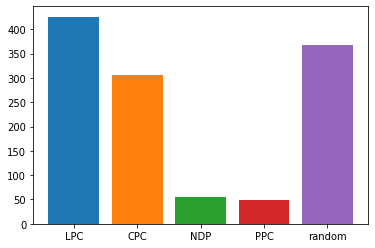

In [ ]:
#visualising using a bar graph - how much each party is mentioned in the tweet
parties = ['LPC', 'CPC', 'NDP', 'PPC', 'random']
fig, ax = plt.subplots()
n = 0
for i in parties:
  count = elections_df[i].value_counts()[1:].sum()
  ax.bar(parties[n], count)
  n +=1

From the assignment method, I can see that the LPC party is mentioned the most. after which the liberal party is mentioned. Many tweets also have other parties mentioned which is why 'random' is high. The reason 'random' is high could also be because my list of words for each party could have included more words for this particular dataset. 

In [ ]:
#Store party name with maximum count
elections_df['max_count_party'] = elections_df.loc[:,['LPC','CPC','NDP','PPC','random']].idxmax(axis=1)

x_axis = elections_df['max_count_party'].value_counts().index
y_axis = elections_df['max_count_party'].value_counts().values
party_count = pd.DataFrame()
party_count['Party'] = x_axis
party_count['Count'] = y_axis

print(party_count)

Party Count
0 LPC 402
1 random 367
2 CPC 198
3 PPC 23
4 NDP 12

After assigning the party to each tweet using the method of counting maximum (mentioned in the beginning), we can see that Liberal Party has a lot of tweets followed by Conservative party. PPC and NDP party are mentioned significantly less. Hence, we can say that the dataset is a bit imbalanced in terms of the different parties. This could affect the models in the later sections 

In [ ]:
elections_df

,text,sentiment,negative_reason,text_cleaned,LPC,CPC,NDP,PPC,random,Max,max,max_count_party
0,The Canadian election is a power grab by PM Tr...,negative,calling election early,canadian election power grab pm trudeau yes ta...,2.0,0.0,0.0,0.0,0.0,LPC,LPC,LPC
1,I do hope Trudeau loses the Canadian election ...,negative,covid,hope trudeau loses canadian election tomorrow ...,3.0,0.0,0.0,0.0,0.0,LPC,LPC,LPC
2,"Dear Canadians, This election is a test of how...",positive,NaN,dear canadians election test progressive wheth...,0.0,0.0,0.0,0.0,1.0,random,random,random
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early,canadian friends never forget trudeau 2 years ...,1.0,0.0,0.0,0.0,0.0,LPC,LPC,LPC
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN,sorry voted life election fighting freedoms ca...,0.0,0.0,0.0,0.0,1.0,random,random,random
...,...,...,...,...,...,...,...,...,...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others,absolutely horrible canada forthcoming electio...,0.0,0.0,0.0,0.0,1.0,random,random,random
998,@davidakin Trudeau imposes gun control policie...,negative,gun control,trudeau imposes gun control policies utterly f...,1.0,1.0,0.0,0.0,0.0,LPC,LPC,LPC
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others,canada election stolen thugs uneducated goons ...,2.0,0.0,0.0,0.0,0.0,LPC,LPC,LPC
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies,otoole amends platform gun control questions r...,0.0,1.0,0.0,0.0,0.0,CPC,CPC,CPC


###PART 2.2 - Graphs and plots 


Word cloud for positive and negative tweets in Canadian Elections Dataset

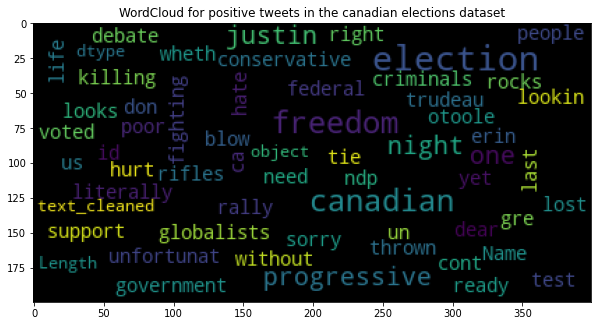

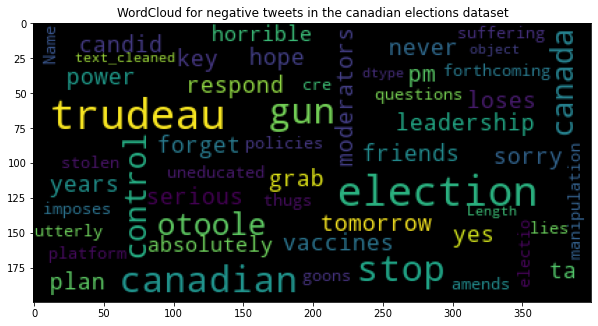

In [ ]:
#copying the elections dataframe 
elections_df_wc = elections_df.copy()

#getting the set of tweets that have positive sentiment 
elections_df_wc_p = elections_df_wc[(elections_df_wc['sentiment'] =='positive')]
positive_words = WordCloud(random_state=1, max_font_size=25).generate(str(elections_df_wc_p['text_cleaned']))

#showing the wordcloud for the positive sentiment 
plt.figure(figsize=(10, 10))
plt.imshow(positive_words)
plt.title('WordCloud for positive tweets in the canadian elections dataset')
plt.show()
print("\n")

#getting the tweets with the negative sentiment 
elections_df_wc_n = elections_df_wc[(elections_df_wc.sentiment=='negative')]
negative_words = WordCloud(random_state=1, max_font_size=25).generate(str(elections_df_wc_n['text_cleaned']))

#Showing the wordcloud for the negative sentiment
plt.figure(figsize=(10, 10))
plt.imshow(negative_words)
plt.title('WordCloud for negative tweets in the canadian elections dataset')
plt.show()

From the word cloud, we can see that words like Canada and Election are words present in both the positive and negative word cloud. But words like gun, horrible, utterly are all associated with negative tweets and words like support, life, Justin are associated with the positive tweets 

Bar graph showing the counts of positive and negative tweets in the Canadian elections dataset

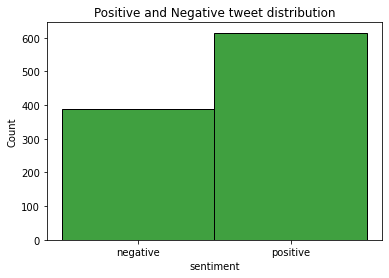

In [ ]:
sns.histplot(data=elections_df, x='sentiment', color = 'green')
plt.title('Positive and Negative tweet distribution')
plt.show()

The Canadian Elections Dataset is quite imbalanced with more positive tweets

Word cloud for positive and negative tweets in the Sentiment Analysis Dataset

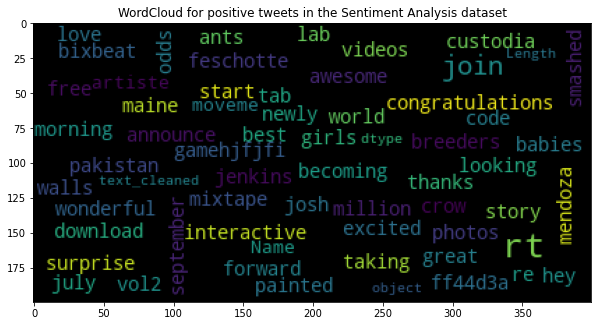

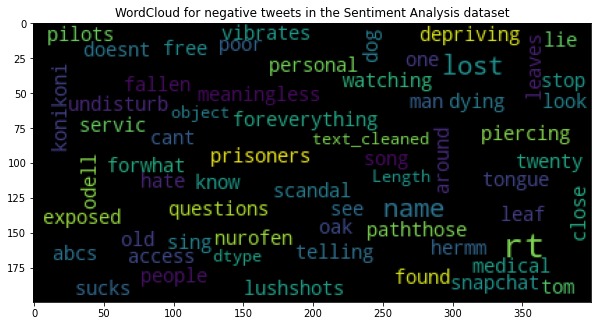

In [ ]:
#copying the sentiment analysis dataset
sentiment_df_wc = sentiment_df.copy()

#getting the set of tweets that have positive sentiment 
sentiment_df_wc_p = sentiment_df_wc[(sentiment_df_wc['label'] ==1)]
positive_words = WordCloud(random_state=1, max_font_size=25).generate(str(sentiment_df_wc_p['text_cleaned']))

#showing the wordcloud for the positive sentiment 
plt.figure(figsize=(10, 10))
plt.imshow(positive_words)
plt.title('WordCloud for positive tweets in the Sentiment Analysis dataset')
plt.show()
print("\n")

#getting the tweets with the negative sentiment 
sentiment_df_wc_n = sentiment_df_wc[(sentiment_df_wc['label']==0)]
negative_words = WordCloud(random_state=1, max_font_size=25).generate(str(sentiment_df_wc_n['text_cleaned']))

#Showing the wordcloud for the negative sentiment
plt.figure(figsize=(10, 10))
plt.imshow(negative_words)
plt.title('WordCloud for negative tweets in the Sentiment Analysis dataset')
plt.show()

Bar graph showing the counts of positive and negative tweets in the Sentiment Analysis dataset

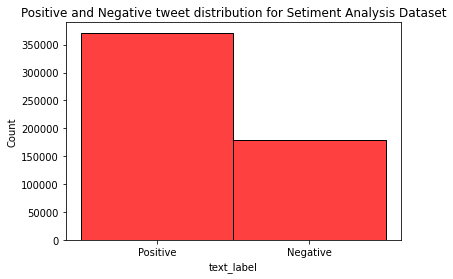

In [ ]:
sentiment_df_wc['text_label'] = sentiment_df_wc['label'].apply(lambda x: 'Positive' if x == 1 else 'Negative')
sns.histplot(data=sentiment_df_wc, x='text_label', color = 'red')
plt.title('Positive and Negative tweet distribution for Setiment Analysis Dataset')
plt.show()

The sentiment analysis dataset is also highly imbalanced with more positive tweets than negative tweets

##PART 3

###PART 3 a)

Splitting the data into train and test sets

In [ ]:
X = sentiment_df.loc[:, ['ID', 'text', 'text_cleaned']]
y = sentiment_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

Defining tfidf vectorizer to process the tweets. I am fitting the vectorizer on the train set and then transforimg the test and train set. 

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features = 5000)
tfidf_vectorizer.fit(X_train['text_cleaned'].values)

X_train_ = tfidf_vectorizer.transform(X_train['text_cleaned'].values)
X_test_ = tfidf_vectorizer.transform(X_test['text_cleaned'].values)

Model Implementation
1. In this section, I am first defining a function that takes as inputs different models. Then, I am fitting the model on the training data. 
2. I am then predicting the sentiments on training and the test data and printing the acccuracies. 
3. The seven models I am creating are : Logistic regression, Support Vector Machine, Multinomial Naive Bayes, Decision Tree Classfier, Random Forest, XGBoost, K-Nearest Neighbours
4. From the training and test accuracies, we can see that Support Vector Machine, Logistic regression, Decision Tree, Random Forest and Naive Bayes Classifier performs really well and have similar accuracies. 
5. XGBoost  Classifier and K-Nearest Neigbhours do not perform that well and have around 80% accuracies on the test and training sets

In [ ]:
#function to implement model training

def model_training(model, X_train, y_train, X_test, y_test, XGB=False):
  
  model.fit(X_train,y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  #for XGB, we need to take the round values from the prediction
  if XGB==True:
    y1 = [round(value) for value in y_pred_train]
    y_pred = y1
  
  acc_train = metrics.accuracy_score(y_train, y_pred_train)
  acc_test = metrics.accuracy_score(y_test, y_pred_test)

  #Print Accuracies for comparison
  print("The accuracy score for the Train set is: {}".format(acc_train))
  print("The accuracy score for the Test set is: {}".format(acc_test))

KNN

In [ ]:
KNN_model = KNeighborsClassifier()
print("Results when KNN model is used:\n")
model_training(KNN_model, X_train_, y_train,  X_test_, y_test)

Results when KNN model is used:

The accuracy score for the Train set is: 0.8803030578317194
The accuracy score for the Test set is: 0.8237356807383788


Logistic Regression

In [ ]:
LR_model = LogisticRegression()
print("Results when Logistic Regression is used:\n")
model_training(LR_model, X_train_, y_train,  X_test_, y_test)

Results when Logistic Regression is used:

The accuracy score for the Train set is: 0.970986482312542
The accuracy score for the Test set is: 0.9674597334641485


Support Vector Classifier

In [ ]:
SVC_model = LinearSVC()
print("Results when SVC model is used:\n")
model_training(SVC_model, X_train_, y_train,  X_test_, y_test)

Results when SVC model is used:

The accuracy score for the Train set is: 0.9725989752720798
The accuracy score for the Test set is: 0.9678231088581837


Multinomial Naive Bayes Classifier

In [ ]:
MultinomialNB_model = MultinomialNB()
print("Results when Naive Bayes model is used:\n")
model_training(MultinomialNB_model, X_train_, y_train,  X_test_, y_test)

Results when Naive Bayes model is used:

The accuracy score for the Train set is: 0.9360567052453714
The accuracy score for the Test set is: 0.9325121049428138


Random Forest Classifier

In [ ]:
randomforest_model = RandomForestClassifier()
print("Results when Random Forest model is used:\n")
model_training(randomforest_model, X_train_, y_train,  X_test_, y_test)

Results when Random Forest model is used:

The accuracy score for the Train set is: 0.9976244117807372
The accuracy score for the Test set is: 0.9585479519254354


Decision Tree Classifier

In [ ]:
decisiontree_model = DecisionTreeClassifier()
print("Results when Decision Tree model is used:\n")
model_training(decisiontree_model, X_train_, y_train,  X_test_, y_test)

Results when Decision Tree model is used:

The accuracy score for the Train set is: 0.9976380384818038
The accuracy score for the Test set is: 0.9435132949972292


XGBoost Classifier

In [ ]:
XGB_model = XGBClassifier()
print("Results when XGBoost model is used:\n")
model_training(XGB_model, X_train_, y_train,  X_test_, y_test, XGB = True)

Results when XGBoost model is used:

The accuracy score for the Train set is: 0.8583663402314722
The accuracy score for the Test set is: 0.8580564867050028


###PART 3- b)

1. In this part, I am training a neural network using the SKLEARN's MLP Classifier. It uses a cross entropy loss function and I am specifying the hidden layer size, batch size and learning rate. 
2. I am splitting the data set with 60% training data and 40% test dataset and then I am using bag of words to process the texts
3. Later, I am performing hyperparameter tuning where I am choosing two different batch sizes and two learning rates and I am finding out which model runs good with the help of the validation dataset. 


Neural Network using MLP Classifier in sklearn

In [ ]:
#splitting the dataset
X_train_neural, X_temp_neural, y_train_neural, y_temp_neural = train_test_split(X, y, test_size=0.4, random_state=1)
X_val__neural, X_test__neural, y_val__neural, y_test__neural = train_test_split(X_temp_neural, y_temp_neural, test_size=0.5, random_state=1)

In [ ]:
#Defining bag of words
bag_of_words = CountVectorizer(max_features = 5000)
bag_of_words.fit(X_train['text_cleaned'].values)

#Applying the bag of words to the dataset. 
X_train_bag = bag_of_words.transform(X_train_neural['text_cleaned'].values)
X_val_bag = bag_of_words.transform(X_val__neural['text_cleaned'].values)
X_test_bag = bag_of_words.transform(X_test__neural['text_cleaned'].values)

In [ ]:
#Defining the neural network architecture and then applying it to the training dataset. 

Neural_network = MLPClassifier(hidden_layer_sizes = 200, batch_size=512, learning_rate_init = 0.01, shuffle = True, verbose = False, random_state=1, max_iter=200).fit(X_train_bag, y_train_neural)
y_pred_train = Neural_network.predict(X_train_bag)
y_pred_val = Neural_network.predict(X_val_bag)

#Calculting the training and validation accuracies

train_acc_neural = metrics.accuracy_score(y_train_neural, y_pred_train)
val_acc_neural = metrics.accuracy_score(y_val__neural, y_pred_val)

#printing the training and validation accuracies
print('The training accuracy without hyperparameter tuning is: ', train_acc_neural)
print('The validation accuracy without hyperparameter tuning is: ', val_acc_neural)

The training accuracy without hyperparameter tuning is:  0.9970899422833506
The validation accuracy without hyperparameter tuning is:  0.9618452370137539


Nueral Network Hyper Parameter Tuning

In [ ]:
batch_sizes = [256, 1024]
learning_rate = [0.001, 0.01]
list_of_models = pd.DataFrame(columns = ['Model_number', 'Learning_Rate', 'Batch_size','Training_accuracy', 'Validation_accuracy'])
count = 1
for lr in learning_rate:
  for batch in batch_sizes:
    clf = MLPClassifier(hidden_layer_sizes = 200, batch_size=batch, learning_rate_init = lr, shuffle = True, verbose = False, 
                        random_state=1, max_iter=100).fit(X_train_bag, y_train_neural)
    y_pred_train = clf.predict(X_train_bag)
    y_pred_val = clf.predict(X_val_bag)
    train_acc = metrics.accuracy_score(y_train_neural, y_pred_train)
    val_acc = metrics.accuracy_score(y_val__neural, y_pred_val)
    list_of_models = list_of_models.append({'Model_number': count, 'Learning_Rate': lr, 'Batch_size': batch,'Training_accuracy': train_acc, 'Validation_accuracy': val_acc}, ignore_index = True)
    count+=1

After the hyperparameter tuning, I am printing the list of models with their parameters and the corresponding training and validation accuracies to see which model works best. It is seen that the model 2 with a learning rate of 0.001 and a batch size of 1024 works best 

In [ ]:
list_of_models

Out[113]:

,Model_number,Learning_Rate,Batch_size,Training_accuracy,Validation_accuracy
0,1.0,0.001,256.0,0.997511,0.967087
1,2.0,0.001,1024.0,0.997459,0.967505
2,3.0,0.010,256.0,0.996109,0.961173
3,4.0,0.010,1024.0,0.996521,0.962845


Testing the test dataset on the best neural network model

Therefore, I am choosing the batch size as 1024 and learning rate as 0.001 and applying it to the test dataset and printing the accuracies 

In [ ]:
neural_network_final = MLPClassifier(hidden_layer_sizes = 100, batch_size=1024, learning_rate_init = 0.001, shuffle = True, verbose = False, random_state=1, max_iter=100).fit(X_train_bag, y_train_neural)
y_pred_train = neural_network_final.predict(X_train_bag)
y_pred_val = neural_network_final.predict(X_val_bag)
y_pred_test = neural_network_final.predict(X_test_bag)
train_acc_best = metrics.accuracy_score(y_train_neural, y_pred_train)
val_acc_best = metrics.accuracy_score(y_val__neural, y_pred_val)
test_acc_best = metrics.accuracy_score(y_test__neural, y_pred_test)
print('The training accuracy with the best neural network model is: ', train_acc_best)
print('The validation accuracy with the best neural network model is: ', val_acc_best)
print('The test accuracy with the best neural network model is: ', test_acc_best)

The training accuracy with the best neural network model is: 0.9975805035217452
The validation accuracy with the best neural network model is: 0.9660695143443739
The test accuracy with the best neural network model is: 0.9669328391427975

###PART 3 C)

Among all the models that I have trained, support vector machine performs the best. Therefore, I am taking that model and applying to the Canadian Elections dataset to identify how well the model performs on a different dataset

In [ ]:
model_best = LinearSVC(max_iter=10000)
elections_df['label'] = elections_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
Canadian_x = elections_df.loc[:,['text', 'negative_reason', 'text_cleaned', 'max_count_party']]
Canadian_y = elections_df['label']
Canadian_elec_tf = tfidf_vectorizer.transform(Canadian_x['text_cleaned'].values)
model_best.fit(X_train_,y_train)
y_pred_canadian = model_best.predict(Canadian_elec_tf)
accuracy_testce = metrics.accuracy_score(Canadian_y, y_pred_canadian)
print("The final test accuracy on the best model (Support Vector Machine): {}".format(accuracy_testce))

The final test accuracy on the best model (Support Vector Machine): 0.7025948103792415

The final test accuracy on the Canadian Elections Dataset is 0.70. This is comparitively lesser than the support vector machine model on the sentiment analsysis dataset where it has around 96% accuracy on the test. 

The reason I believe this could happen is because words in the sentiment analysis dataset has a quite generic list of positive and negative words list which can be seen from the wordclouds. Some of the negative words are 'depriving' and 'prisoners'. Some of the positive words are 'Congratulations', and 'thanks'. Words such as 'Canada', 'Elections', 'Justin', 'Freedom' etc. which are specific to the Canadian Elections Dataset is not present in the dataset in which the model was trained. This could be the reason for such large discrepancy in the accuracies. 

###PART 3 D)

Two other Evaluation metrics that we can use for the classification tasks are:

1. F1 Score - Precision is the number of true positives / number of true positives + False positives. It is how much positives the model correctly predicts. Recall is the ratio of true positives/true postives + true negative. F1 score combines the precision and recall into a single metric by calculating their harmonic mean. It is really good metric to identify how the model performs in both classifying correctly and recalling the labels from the training data 

2. AUC (Area under the curve) - AUC calculates the area between the receiver operating characteristic curve and is a probability value between 0 and 1. The higher the AUC curve is, the better the model is 

###PART 3 e)

In [ ]:
#adding a label to the election dataset
elections_df['predicted_label'] = y_pred_canadian
elections_df['predicted_sentiment'] = ['positive' if i==1 else 'negative' for i in y_pred_canadian]

In [ ]:
elections_df

Out[75]:

,text,sentiment,negative_reason,text_cleaned,label,LPC,CPC,NDP,PPC,random,max_count_party,predicted_sentiment,predicted_label
0,The Canadian election is a power grab by PM Tr...,negative,calling election early,canadian election power grab pm trudeau yes ta...,0,2.0,0.0,0.0,0.0,0.0,LPC,negative,0
1,I do hope Trudeau loses the Canadian election ...,negative,covid,hope trudeau loses canadian election tomorrow ...,0,3.0,0.0,0.0,0.0,0.0,LPC,negative,0
2,"Dear Canadians, This election is a test of how...",positive,NaN,dear canadians election test progressive wheth...,1,0.0,0.0,0.0,0.0,1.0,random,negative,0
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early,canadian friends never forget trudeau 2 years ...,0,1.0,0.0,0.0,0.0,0.0,LPC,negative,0
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN,sorry voted life election fighting freedoms ca...,1,0.0,0.0,0.0,0.0,1.0,random,negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others,absolutely horrible canada forthcoming electio...,0,0.0,0.0,0.0,0.0,1.0,random,negative,0
998,@davidakin Trudeau imposes gun control policie...,negative,gun control,trudeau imposes gun control policies utterly f...,0,1.0,1.0,0.0,0.0,0.0,LPC,negative,0
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others,canada election stolen thugs uneducated goons ...,0,2.0,0.0,0.0,0.0,0.0,LPC,negative,0
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies,otoole amends platform gun control questions r...,0,0.0,1.0,0.0,0.0,0.0,CPC,negative,0


In [ ]:
#creating a table that has the true sentiments for each party 
elections_given = pd.pivot_table(elections_df, values='label', index='sentiment', columns='max_count_party',
                          aggfunc='count')

In [ ]:
#creating a table that has the predicted sentiments for each party 
elections_predicted = pd.pivot_table(elections_df, values='predicted_label', index='predicted_sentiment', columns='max_count_party',
                          aggfunc='count')

Out[82]:

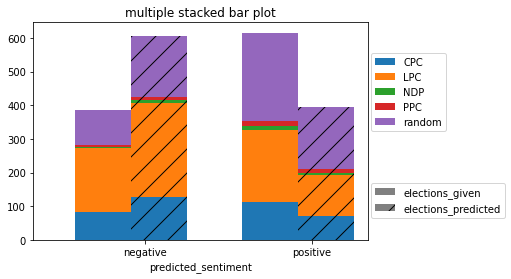

<AxesSubplot:title={'center':'multiple stacked bar plot'}, xlabel='predicted_sentiment'>

In [ ]:
#creating a function to visualise the true and predicted labels for each of the parties 
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

plot_clustered_stacked([elections_given, elections_predicted],["elections_given", "elections_predicted"])

We can see from the results that the model in general predicts more of the tweets as negative than positive. This could be because there could be words that are there both in the negative and positively labeled tweets that the model could not differentiate between. Words like 'Canadian' and 'Election' are present in both the positive and negatively labeled tweets. For the LPC and CPC party, the public has approximately neutral opinions about it. The positive and negative tweets are equally distributed for the LPC party and the positive tweets are slightly higher for the CPC party. Both NDP and PPC are not discussed as much, but among the tweets, the public seems to have a good positive opinion about it. 

The model predicts more tweets as negative and this is especially significant with the LPC and CPC party. 
One way to improve the accuracy of the model is we can include the common words like Canada and Elections into the stop words. This would increase more unique words in each set and makes the model's job easier. We could also train the model using some other publicly available sentiment analysis dataset to give it more exposure to different positive and negative words. We could also incorporate more hyper parameter tuning. 

###PART 4

Here, I am extracting the ngative tweets, fitting the bag of words vectorizer and tranforming both the train and test set

In [ ]:
#part 4
elections_df_negative = elections_df[elections_df['sentiment']=='negative']
Canadian_x_negative = elections_df_negative
Canadian_y_negative = elections_df_negative['negative_reason']
X_train_CE, X_test_CE, y_train_CE, y_test_CE = train_test_split(Canadian_x_negative, Canadian_y_negative, test_size=0.30, random_state=100)

#Defining the bag of words
vectorizer_bag = CountVectorizer()
vectorizer_bag.fit(Canadian_x_negative['text_cleaned'].values)

#tranforming the training and test dataset
X_train_CE = vectorizer_bag.transform(X_train_CE['text_cleaned'].values)
X_test_CE = vectorizer_bag.transform(X_test_CE['text_cleaned'].values)


I am taking the linear support vector machine that performed the best in the election and sentiment analysis dataset in the part 3 section. I am defining a grid search with C parameter and penalty. I am also defining 10 fold cross validation and running the grid search to find out the best parameters 

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'penalty' : ['l1', 'l2'],
              }
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(LinearSVC(), param_grid, cv=kfold, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_CE, y_train_CE)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .............................C=0.1, penalty=l1; total time= 0.0s
[CV 2/10] END .............................C=0.1, penalty=l1; total time= 0.0s
[CV 3/10] END .............................C=0.1, penalty=l1; total time= 0.0s
[CV 4/10] END .............................C=0.1, penalty=l1; total time= 0.0s
[CV 5/10] END .............................C=0.1, penalty=l1; total time= 0.0s
[CV 6/10] END .............................C=0.1, penalty=l1; total time= 0.0s
[CV 7/10] END .............................C=0.1, penalty=l1; total time= 0.0s
[CV 8/10] END .............................C=0.1, penalty=l1; total time= 0.0s
[CV 9/10] END .............................C=0.1, penalty=l1; total time= 0.0s
[CV 10/10] END ............................C=0.1, penalty=l1; total time= 0.0s
[CV 1/10] END .............................C=0.1, penalty=l2; total time= 0.0s
[CV 2/10] END .............................C=0.1, penalty=l2; total time= 0.0s
[CV 3/10] END .............................C=0.1, penalty=l2; total time= 0.0s
[CV 4/10] END .............................C=0.1, penalty=l2; total time= 0.0s
[CV 5/10] END .............................C=0.1, penalty=l2; total time= 0.0s
[CV 6/10] END .............................C=0.1, penalty=l2; total time= 0.0s
[CV 7/10] END .............................C=0.1, penalty=l2; total time= 0.0s
[CV 8/10] END .............................C=0.1, penalty=l2; total time= 0.0s
[CV 9/10] END .............................C=0.1, penalty=l2; total time= 0.0s
[CV 10/10] END ............................C=0.1, penalty=l2; total time= 0.0s
[CV 1/10] END ...............................C=1, penalty=l1; total time= 0.0s
[CV 2/10] END ...............................C=1, penalty=l1; total time= 0.0s
[CV 3/10] END ...............................C=1, penalty=l1; total time= 0.0s
[CV 4/10] END ...............................C=1, penalty=l1; total time= 0.0s
[CV 5/10] END ...............................C=1, penalty=l1; total time= 0.0s
[CV 6/10] END ...............................C=1, penalty=l1; total time= 0.0s
[CV 7/10] END ...............................C=1, penalty=l1; total time= 0.0s
[CV 8/10] END ...............................C=1, penalty=l1; total time= 0.0s
[CV 9/10] END ...............................C=1, penalty=l1; total time= 0.0s
[CV 10/10] END ..............................C=1, penalty=l1; total time= 0.0s
[CV 1/10] END ...............................C=1, penalty=l2; total time= 0.0s
[CV 2/10] END ...............................C=1, penalty=l2; total time= 0.0s
[CV 3/10] END ...............................C=1, penalty=l2; total time= 0.0s
[CV 4/10] END ...............................C=1, penalty=l2; total time= 0.0s
[CV 5/10] END ...............................C=1, penalty=l2; total time= 0.0s
[CV 6/10] END ...............................C=1, penalty=l2; total time= 0.0s
[CV 7/10] END ...............................C=1, penalty=l2; total time= 0.0s
[CV 8/10] END ...............................C=1, penalty=l2; total time= 0.0s
[CV 9/10] END ...............................C=1, penalty=l2; total time= 0.0s
[CV 10/10] END ..............................C=1, penalty=l2; total time= 0.0s
[CV 1/10] END ..............................C=10, penalty=l1; total time= 0.0s
[CV 2/10] END ..............................C=10, penalty=l1; total time= 0.0s
[CV 3/10] END ..............................C=10, penalty=l1; total time= 0.0s
[CV 4/10] END ..............................C=10, penalty=l1; total time= 0.0s
[CV 5/10] END ..............................C=10, penalty=l1; total time= 0.0s
[CV 6/10] END ..............................C=10, penalty=l1; total time= 0.0s
[CV 7/10] END ..............................C=10, penalty=l1; total time= 0.0s
[CV 8/10] END ..............................C=10, penalty=l1; total time= 0.0s
[CV 9/10] END ..............................C=10, penalty=l1; total time= 0.0s
[CV 10/10] END .............................C=10, penalty=l1; tota

Here, I am printing the best model and the best parameters 

In [ ]:
print("The best model is:", grid.best_estimator_)
print("The best parameters are:", grid.best_params_)

The best model is: LinearSVC(C=0.1)
The best parameters are: {'C': 0.1, 'penalty': 'l2'}

Here, I am fitting the best model from the above cell on the training data and calculating the train and test accuracy 

In [ ]:
best_model_nr = LinearSVC(C=0.1)
best_model_nr.fit(X_train_CE, y_train_CE)
y_pred_nr_train = best_model_nr.predict(X_train_CE)
train_acc = metrics.accuracy_score(y_train_CE, y_pred_nr_train)
y_pred_nr_test = best_model_nr.predict(X_test_CE)
test_acc = metrics.accuracy_score(y_test_CE, y_pred_nr_test)

print("Training Accuracy for negative reason classification is:", train_acc)
print("Test Accuracy for negative reason classification is:", test_acc)

Training Accuracy for negative reason classification is: 1.0
Test Accuracy for negative reason classification is: 0.48717948717948717

Part 4 a) It is evident that the model is not performing that well on the test set. On the training dataset the model is having a 100 % accuracy, whereas it only has 48% accuracy on the test set. This suggests that the model is too complicated and the model perfectly learnt the training data but could not fit properly to the test dataset. 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print("confusion matrix for negative reason classification on the test set")
cm = confusion_matrix(y_test_CE, y_pred_nr_test)
print(cm)

confusion matrix for negative reason classification on the test set
[[15 0 0 1 0 0 2 0 1 0]
 [ 0 1 0 0 0 0 3 0 0 0]
 [ 4 0 0 0 0 0 4 0 2 0]
 [ 1 0 0 2 0 0 5 0 1 0]
 [ 0 0 0 0 1 0 3 0 0 0]
 [ 0 0 0 0 0 0 1 0 1 0]
 [ 4 0 0 0 1 0 36 0 3 0]
 [ 0 0 0 0 1 0 3 0 0 0]
 [ 1 0 0 0 0 0 16 0 2 0]
 [ 0 0 0 0 0 0 1 0 1 0]]

The confusion matrix has the true labels on the left side and the actual lavels on the top. From the confusion matrix we can see that data for each label is quite unbalanced. Out of the 10 labels (0-9 from the left), 6th label seems to have a lot of data and the 9th label does not even have any data. 

Part 4 B) One way to improve the model is to have a balanced training and test dataset. The data points in the training data is also less for the number of classes that are present. As there are 10 classes, for the model to better understand the characteristics of each class, we would need more data points. 